In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt

In [73]:
0.05/(0.2625*1.3)


0.1465201465201465

In [74]:
0.24/(0.2625*1.3)

0.7032967032967031

$\epsilon=\rho \delta \zeta$

In [75]:
d=0.2625
a=6.8927
k=0.4032
c=2.3952
ksi=1.3
rho=np.linspace(0.1,0.6,150)


In [76]:
def model(r,p):
    x=r[0]
    y=r[1]
    z=r[2]
    x1=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*p*d*(a*y+x*x)
    z1=d*(k-z-0.5*x)
    return np.array([x1,y1,z1])

In [77]:
def jac(r,p):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*(-a + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*a,0],
                [-d*0.5,0,-d]])
    return M

In [78]:
def mul(r,p,g):
    res=np.matmul(jac(r,p),g)
    return res

In [79]:
def integration():
    exp1=[]
    exp2=[]
    exp3=[]
    for i in rho:
        g=np.identity(3)
        tmax=800
        h=0.01
        t=0
        x=-3
        y=0
        z=0
        r=np.array([x,y,z])
        talp=0
        talp2=0
        talp3=0
        
        # Time loop
        while (t<tmax):
            xt=r[0]
            yt=r[1]
            zt=r[2]
    
            #evolution of the perturbations along the Lyapunov directions
            l1=mul(r,i,g)
            l2=mul(r,i,g+0.5*h*l1)
            l3=mul(r,i,g+0.5*h*l2)
            l4=mul(r,i,g+h*l3)
            g=g+(1.0/6)*h*(l1+2*l2+2*l3+l4)
    
            g1=g[:,0]
            g2=g[:,1]
            g3=g[:,2]
    
            # Gram-Schmittage
            #1er exposant
            norm=np.linalg.norm(g1)
            alp=np.log(norm)
            talp=talp+alp
            g1=g1/norm
    
            #2eme exposant
            g2p=g2-g1*(np.dot(g2,g1))
            norm2=np.linalg.norm(g2p)
            alp2=np.log(norm2)
            talp2=talp2+alp2
            g2=g2p/norm2
    
            #3eme exposant
            g3p=(g3-g2*(np.dot(g3,g2))-g1*(np.dot(g3,g1)))
            norm3=np.linalg.norm(g3p)
            alp3=np.log(norm3)
            talp3=talp3+alp3
            g3=g3p/norm3
    
            # Gathering the new directions into a matrix
            g=np.hstack([g1[:,np.newaxis],g2[:,np.newaxis],g3[:,np.newaxis]])
    
            # Model time evolution
            k1=model(r,i)
            k2=model(r+0.5*h*k1,i)
            k3=model(r+0.5*h*k2,i)
            k4=model(r+k3*h,i)
            r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
            t=t+h
        l1=talp/tmax
        l2=talp2/tmax
        l3=talp3/tmax
        exp1.append(l1)
        exp2.append(l2)
        exp3.append(l3)
    return (exp1,exp2,exp3)

In [80]:
result=integration()

In [81]:
epsi=rho*d*ksi

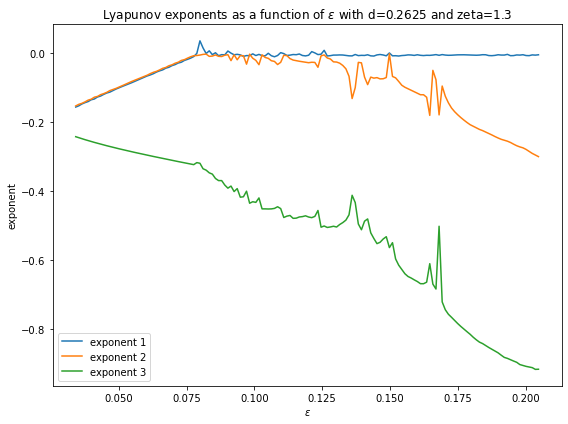

In [86]:
fig, ax1 = plt.subplots(figsize=(8,6))

color = 'tab:blue'
ax1.set_xlabel('$\epsilon$')
ax1.set_ylabel('exponent')
ax1.set_title('Lyapunov exponents as a function of $\epsilon$ with d=0.2625 and zeta=1.3')
ax1.plot(epsi, result[0], color=color, label='exponent 1')

color = 'tab:orange'
ax1.set_xlabel('epsilon')
ax1.plot(epsi, result[1],color=color, label='exponent 2')

color = 'tab:green'
ax1.set_xlabel('$\epsilon$')
ax1.plot(epsi, result[2], color=color, label='exponent 3')

plt.legend()
fig.tight_layout()  
plt.show()